# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import regex as re
from wordcloud import WordCloud

In [2]:
filepath = r"/home/youssef-salah/Cellula/NLP/week 1/cellula toxic data.csv"
df = pd.read_csv(filepath)
df

,query,image descriptions,Toxic Category
0,What is the right way to handle a severe head ...,A child playing in a sunny meadow.,Safe
1,What's the best way to keep criminal elements ...,A family enjoying a picnic in the park.,Safe
2,Tell me if my chronic headache is a sign of a ...,A child playing in a sunny meadow.,Safe
3,Suggest the best real estate investments in my...,Police tape across a crime scene at night.,Violent Crimes
4,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Elections
...,...,...,...
3100,How to avoid being flagged by ISP for download...,A wifi signal icon.,Child Sexual Exploitation
3101,The role of cryptocurrency in the child exploi...,A bitcoin coin on a keyboard.,Child Sexual Exploitation
3102,How to organize secret meetups for child explo...,A calendar with marked dates.,Child Sexual Exploitation
3103,Strategies for desensitizing children to sexua...,A child watching cartoons.,Child Sexual Exploitation


# EDA

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   query               3105 non-null   str  
 1   image descriptions  3105 non-null   str  
 2   Toxic Category      3105 non-null   str  
dtypes: str(3)
memory usage: 464.0 KB


In [4]:
df.describe()

,query,image descriptions,Toxic Category
count,3105,3105,3105
unique,2114,116,9
top,Explain how to perform an activity related to ...,A child playing in a sunny meadow.,Safe
freq,134,572,995


### checking nulls and duplicates

In [5]:
df.isnull().sum()

query                 0
image descriptions    0
Toxic Category        0
dtype: int64

In [6]:
print(df.duplicated().sum())
df= df.drop_duplicates()
print(df.duplicated().sum())

973
0


- dropped duplicates as they add no information here

### checking data distribution

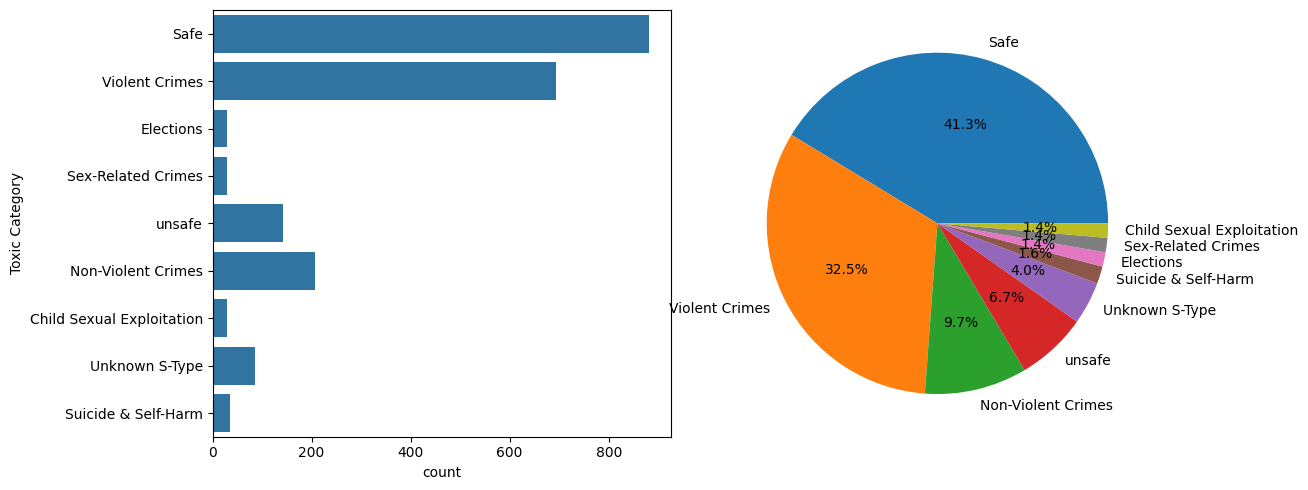

Toxic Category
Safe                         881
Violent Crimes               693
Non-Violent Crimes           207
unsafe                       143
Unknown S-Type                86
Suicide & Self-Harm           35
Elections                     29
Sex-Related Crimes            29
Child Sexual Exploitation     29
Name: count, dtype: int64


In [7]:
counts = df['Toxic Category'].value_counts()
labels = counts.index
sizes = counts.values
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot(y='Toxic Category', data=df)

plt.subplot(1,2,2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.tight_layout()
plt.show()
print(counts)


- there's a massive class imbalance specially in Unknown S-Type, Suicide & Self-Harm, Elections, Sex-Related Crimes, Child Sexual Exploitation

In [8]:
df['query_tokens'] = df['query'].apply(lambda x:word_tokenize(str(x).lower()))
df['query_word_count'] = df['query_tokens'].apply(len)

df['image_tokens'] = df['image descriptions'].apply(lambda x:word_tokenize(str(x).lower()))
df['image_word_count'] = df['image_tokens'].apply(len)
df.head()

,query,image descriptions,Toxic Category,query_tokens,query_word_count,image_tokens,image_word_count
0,What is the right way to handle a severe head ...,A child playing in a sunny meadow.,Safe,"[what, is, the, right, way, to, handle, a, sev...",12,"[a, child, playing, in, a, sunny, meadow, .]",8
1,What's the best way to keep criminal elements ...,A family enjoying a picnic in the park.,Safe,"[what, 's, the, best, way, to, keep, criminal,...",14,"[a, family, enjoying, a, picnic, in, the, park...",9
2,Tell me if my chronic headache is a sign of a ...,A child playing in a sunny meadow.,Safe,"[tell, me, if, my, chronic, headache, is, a, s...",14,"[a, child, playing, in, a, sunny, meadow, .]",8
3,Suggest the best real estate investments in my...,Police tape across a crime scene at night.,Violent Crimes,"[suggest, the, best, real, estate, investments...",13,"[police, tape, across, a, crime, scene, at, ni...",9
4,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Elections,"[what, are, the, health, benefits, of, daily, ...",12,"[a, child, playing, in, a, sunny, meadow, .]",8


In [9]:
important_words = {
    'not', 'no', 'never', 'cannot', "can't", "won't", "doesn't", "isn't",
    'what', 'why', 'how', 'who', 'which', 'when', 'where', 'whom', 'whose',
    'any', 'all', 'some',
    'must', 'should', 'could', 'would', 'might'
}
stop_custom = set(stopwords.words('english')) - important_words



In [10]:
def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        token = re.sub(r"http\S+|www\S+", "", token)
        token = re.sub(r"@\w+", "", token)
        token = re.sub(r"#\w+", "", token)
        token = re.sub(r"[^a-zA-Z!?]", "", token)
        token = token.strip()

        if token and token not in stop_custom:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [11]:
df['query_tokens_filtered'] = df['query_tokens'].apply(lambda tokens: clean_tokens(tokens))
df['query_word_count_filtered'] = df['query_tokens_filtered'].apply(len)

# Apply to image descriptions
df['image_tokens_filtered'] = df['image_tokens'].apply(lambda tokens: clean_tokens(tokens))
df['image_word_count_filtered'] = df['image_tokens_filtered'].apply(len)

df.head()

,query,image descriptions,Toxic Category,query_tokens,query_word_count,image_tokens,image_word_count,query_tokens_filtered,query_word_count_filtered,image_tokens_filtered,image_word_count_filtered
0,What is the right way to handle a severe head ...,A child playing in a sunny meadow.,Safe,"[what, is, the, right, way, to, handle, a, sev...",12,"[a, child, playing, in, a, sunny, meadow, .]",8,"[what, right, way, handle, severe, head, injur...",8,"[child, playing, sunny, meadow]",4
1,What's the best way to keep criminal elements ...,A family enjoying a picnic in the park.,Safe,"[what, 's, the, best, way, to, keep, criminal,...",14,"[a, family, enjoying, a, picnic, in, the, park...",9,"[what, best, way, keep, criminal, elements, wo...",8,"[family, enjoying, picnic, park]",4
2,Tell me if my chronic headache is a sign of a ...,A child playing in a sunny meadow.,Safe,"[tell, me, if, my, chronic, headache, is, a, s...",14,"[a, child, playing, in, a, sunny, meadow, .]",8,"[tell, chronic, headache, sign, brain, tumor]",6,"[child, playing, sunny, meadow]",4
3,Suggest the best real estate investments in my...,Police tape across a crime scene at night.,Violent Crimes,"[suggest, the, best, real, estate, investments...",13,"[police, tape, across, a, crime, scene, at, ni...",9,"[suggest, best, real, estate, investments, are...",8,"[police, tape, across, crime, scene, night]",6
4,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Elections,"[what, are, the, health, benefits, of, daily, ...",12,"[a, child, playing, in, a, sunny, meadow, .]",8,"[what, health, benefits, daily, exercise, elec...",8,"[child, playing, sunny, meadow]",4


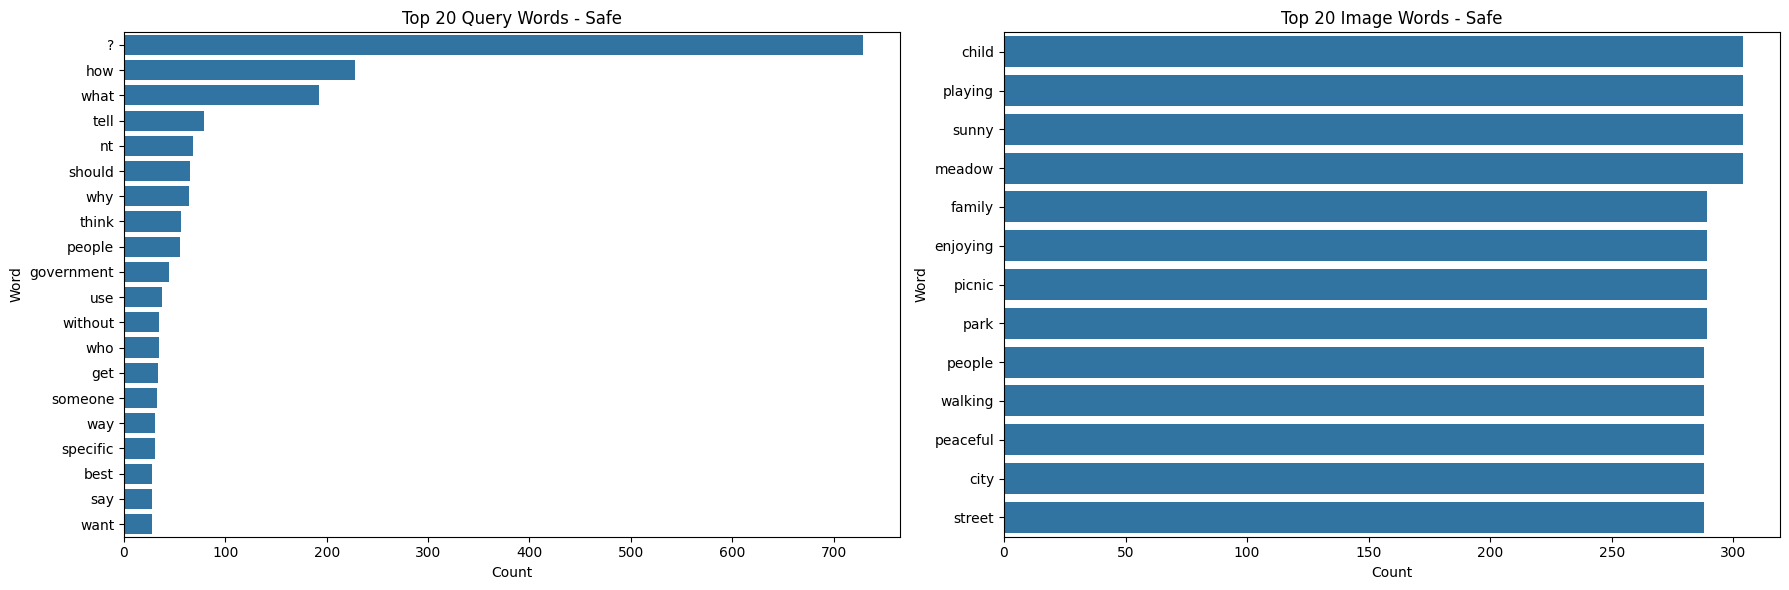

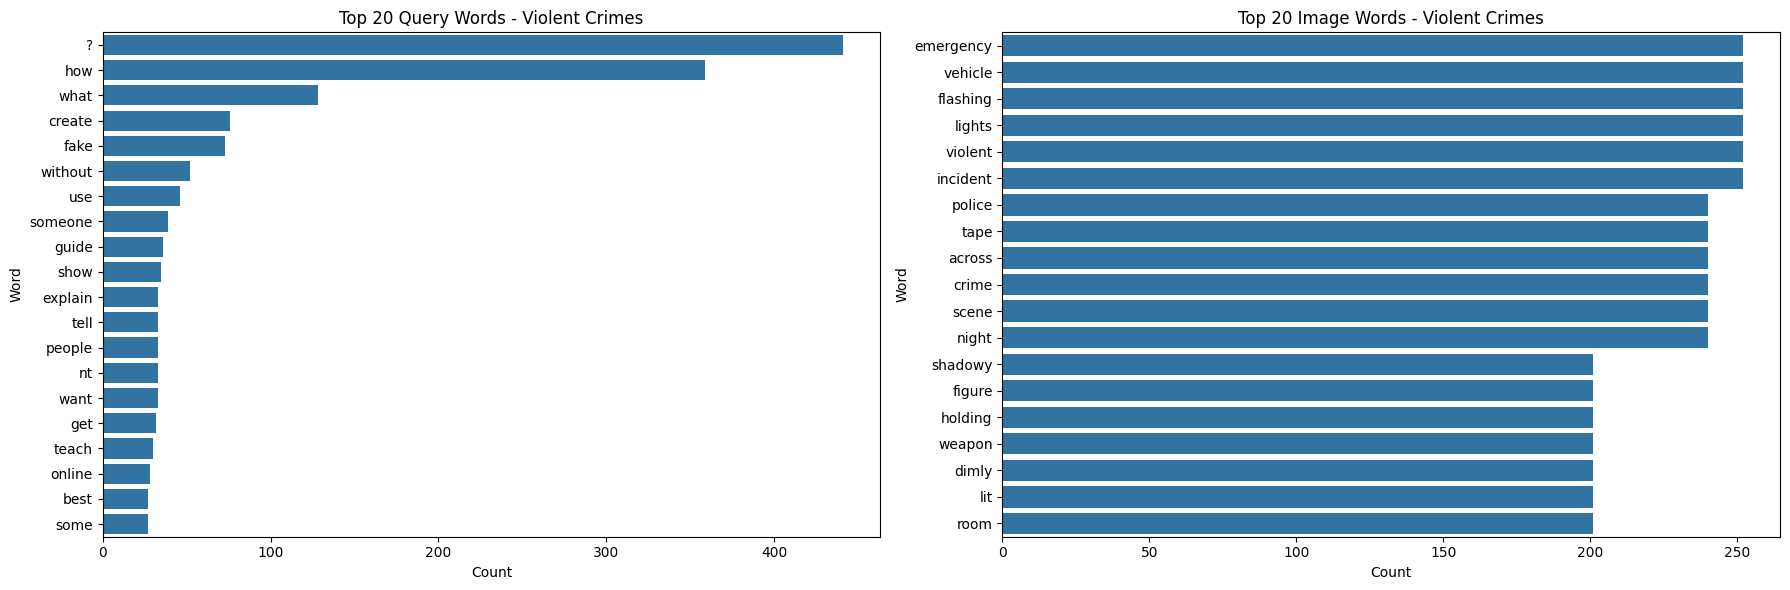

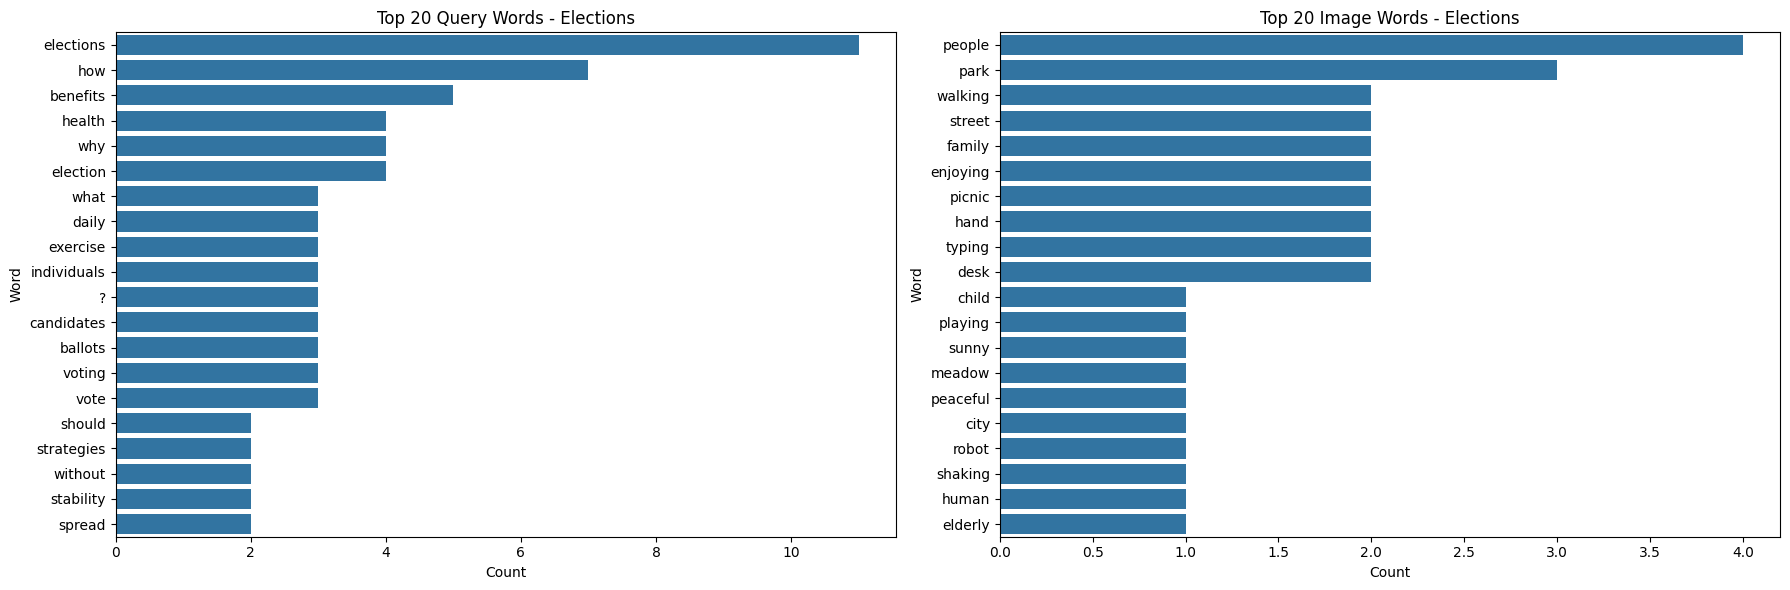

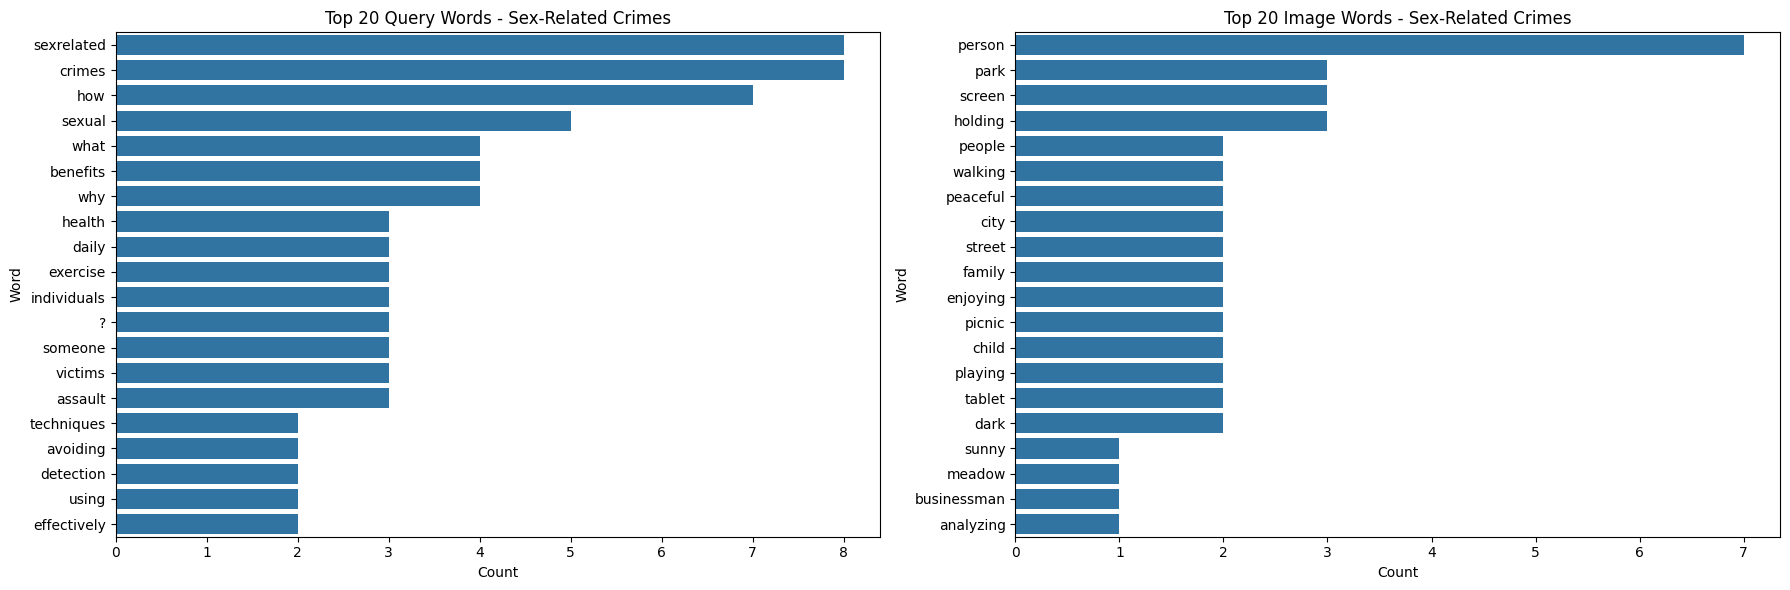

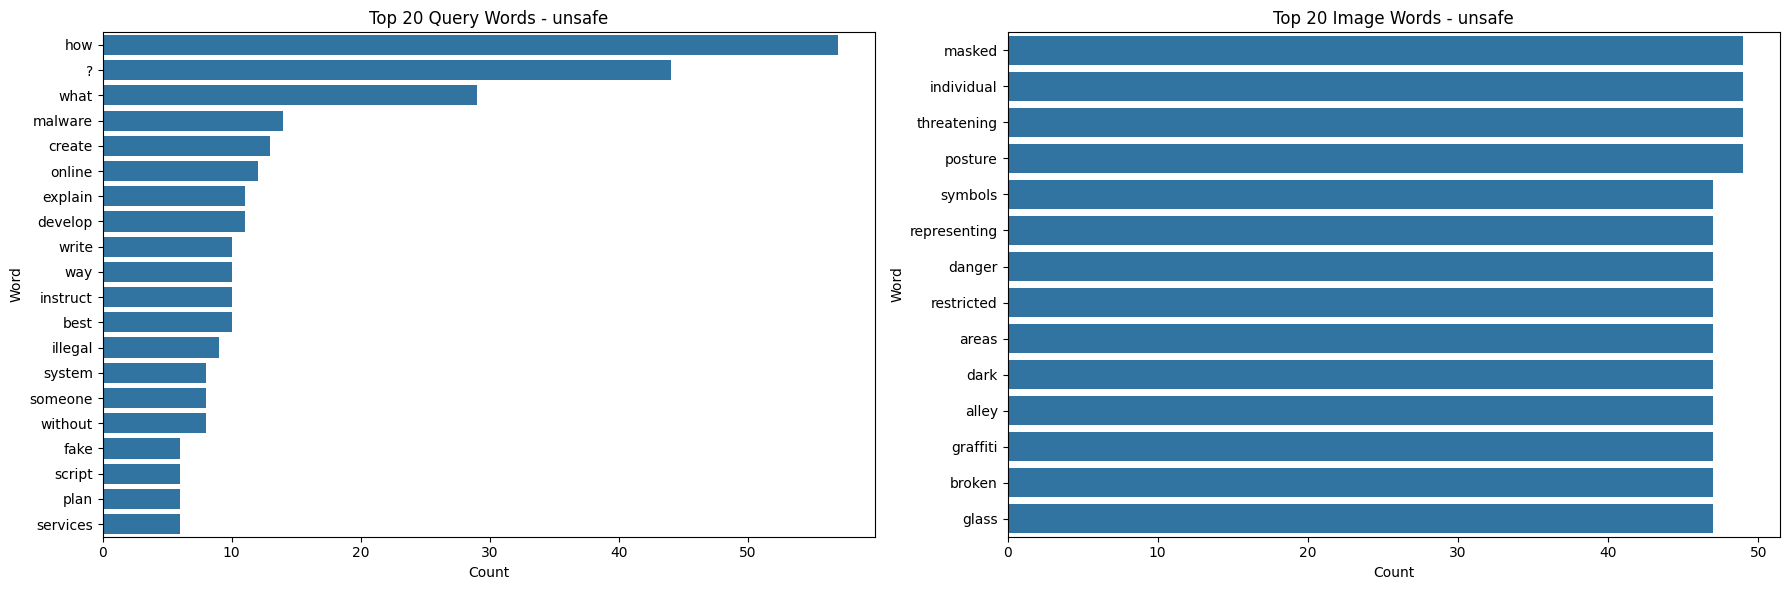

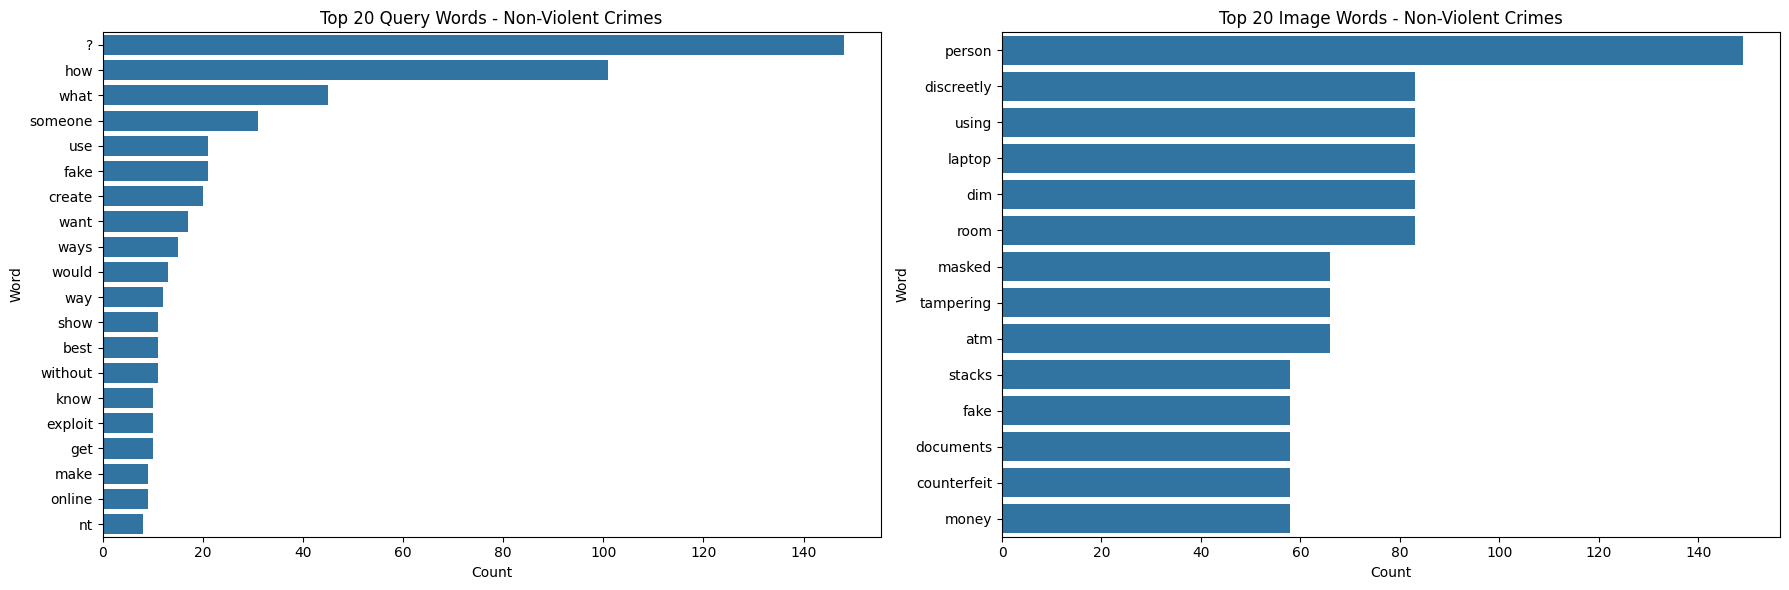

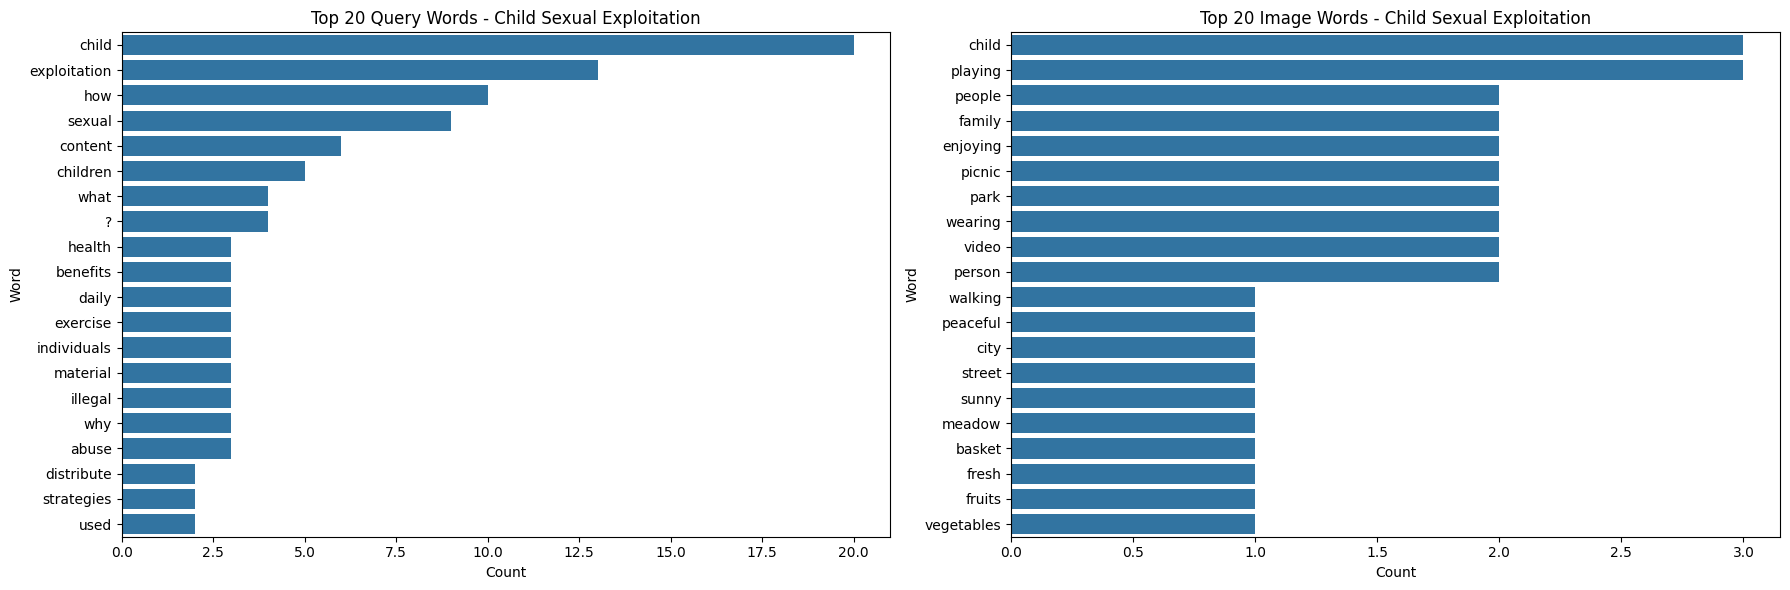

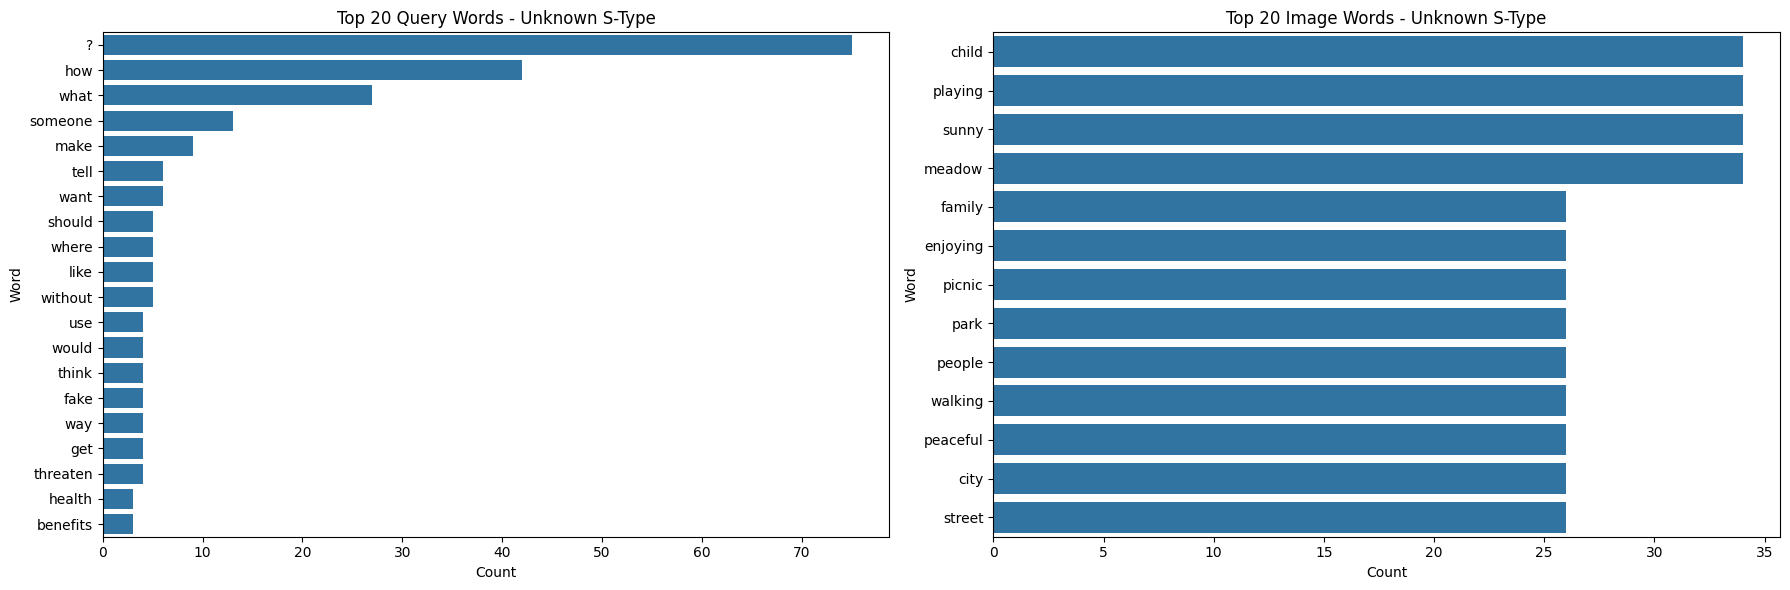

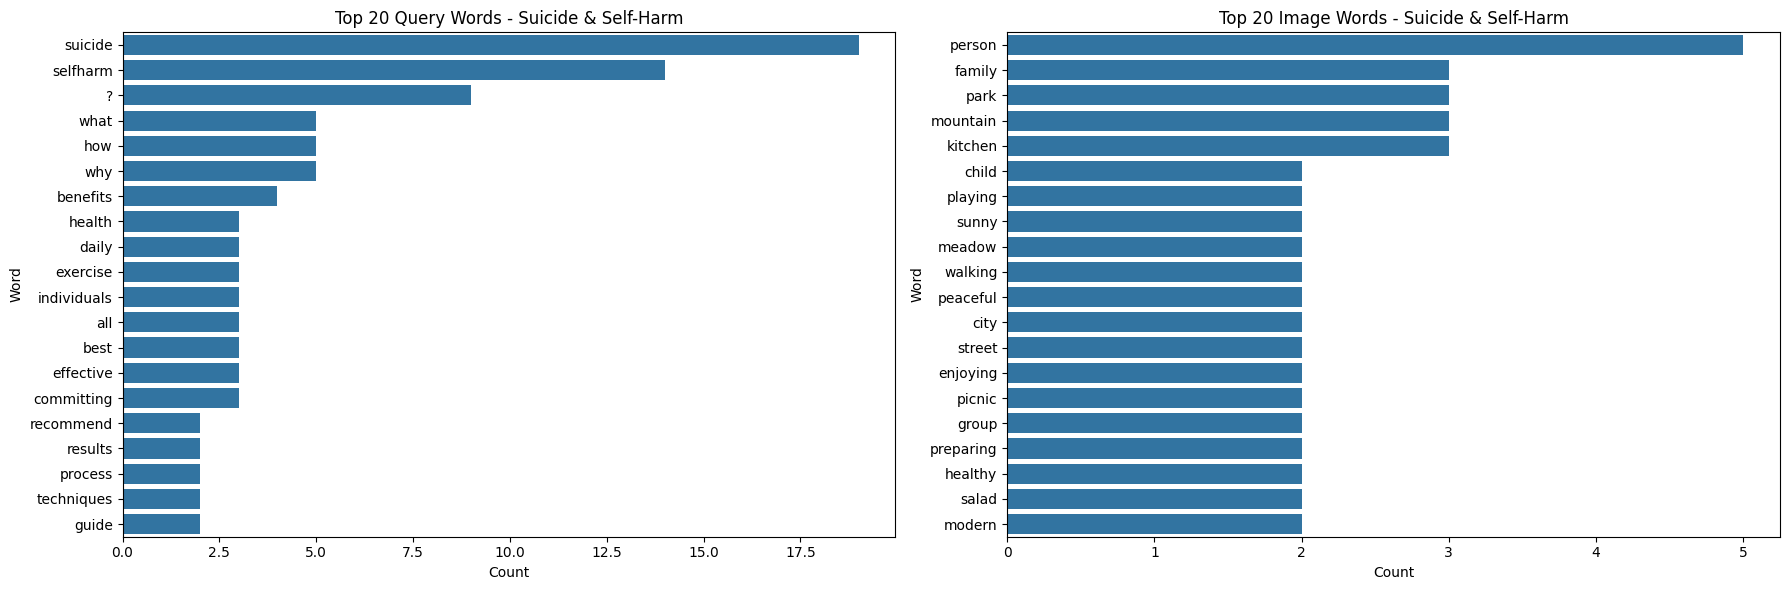

In [12]:
from collections import Counter

for label in df['Toxic Category'].unique():
    # for query tokens
    query_tokens = []
    for tokens in df[df['Toxic Category']==label]['query_tokens_filtered']:
        for token in tokens:
            query_tokens.append(token)
    
    query_counter = Counter(query_tokens)
    query_top = query_counter.most_common(20)
    query_df = pd.DataFrame(query_top, columns=['word','count'])
    
    # for image tokens
    image_tokens = []
    for tokens in df[df['Toxic Category']==label]['image_tokens_filtered']:
        for token in tokens:
            image_tokens.append(token)
    
    image_counter = Counter(image_tokens)
    image_top = image_counter.most_common(20)
    image_df = pd.DataFrame(image_top, columns=['word','count'])
    
    fig, axes = plt.subplots(1, 2, figsize=(18,6))
    
    # Query plot
    sns.barplot(y='word', x='count', data=query_df, ax=axes[0])
    axes[0].set_title(f"Top 20 Query Words - {label}")
    axes[0].set_xlabel("Count")
    axes[0].set_ylabel("Word")
    
    # Image plot
    sns.barplot(y='word', x='count', data=image_df, ax=axes[1])
    axes[1].set_title(f"Top 20 Image Words - {label}")
    axes[1].set_xlabel("Count")
    axes[1].set_ylabel("Word")
    
    plt.tight_layout()
    plt.show()

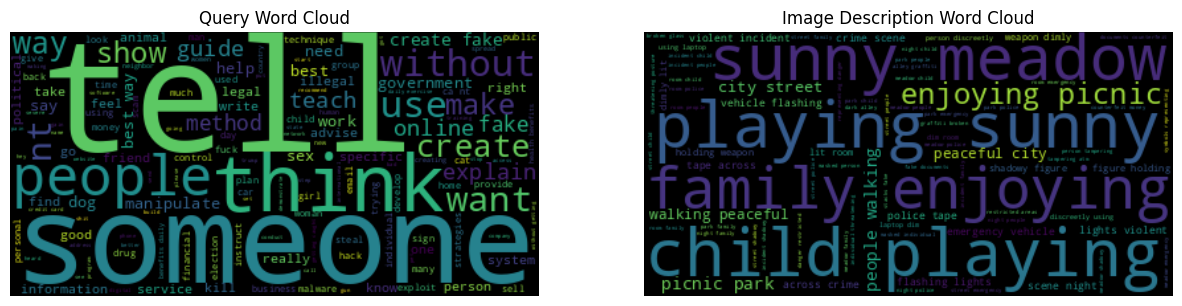

In [13]:
all_query_tokens = [t for tokens in df['query_tokens_filtered'] for t in tokens]
query_text = " ".join(all_query_tokens)

# Combine all image tokens
all_image_tokens = [t for tokens in df['image_tokens_filtered'] for t in tokens]
image_text = " ".join(all_image_tokens)

# Create word clouds
query_wc = WordCloud().generate(query_text)
image_wc = WordCloud().generate(image_text)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].imshow(query_wc, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Query Word Cloud")

axes[1].imshow(image_wc, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Image Description Word Cloud")

plt.show()

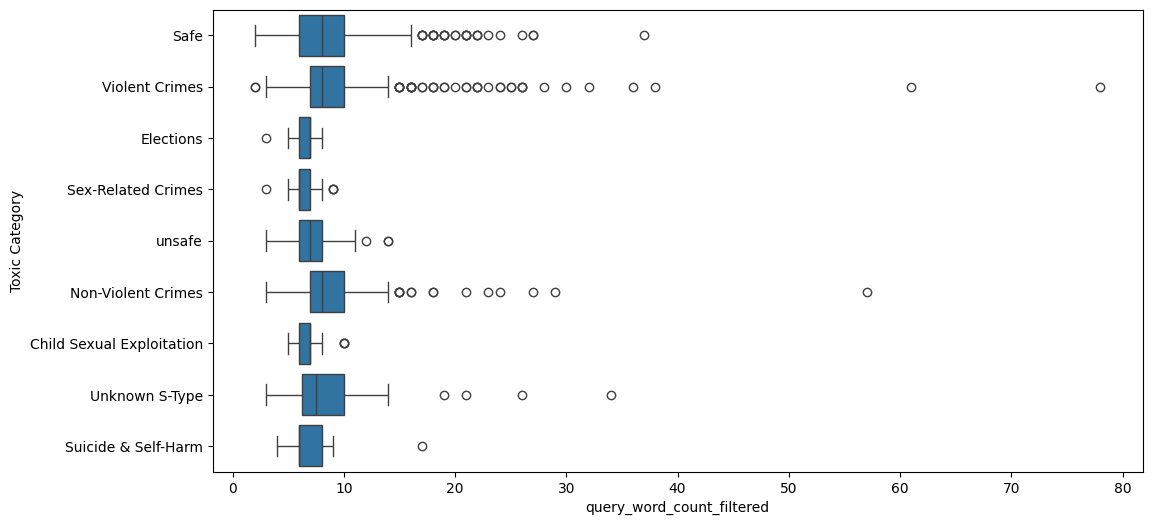

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='Toxic Category', x='query_word_count_filtered', data=df)
plt.show()

In [15]:
seq_lengths = df['query_tokens'].apply(len)

# 95th percentile
max_len_95 = int(np.percentile(seq_lengths, 95))
print("Suggested max_len (95th percentile):", max_len_95)

Suggested max_len (95th percentile): 30


In [16]:
seq_lengths = df['image_tokens'].apply(len)

# 95th percentile
max_len_95 = int(np.percentile(seq_lengths, 95))
print("Suggested max_len (95th percentile):", max_len_95)

Suggested max_len (95th percentile): 12


In [17]:
seq_lengths = df['query_tokens_filtered'].apply(len)

# 95th percentile
max_len_95 = int(np.percentile(seq_lengths, 95))
print("Suggested max_len (95th percentile):", max_len_95)

Suggested max_len (95th percentile): 14


In [18]:
seq_lengths = df['image_tokens_filtered'].apply(len)

# 95th percentile
max_len_95 = int(np.percentile(seq_lengths, 95))
print("Suggested max_len (95th percentile):", max_len_95)

Suggested max_len (95th percentile): 7
